LINEAR REGRESSION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
file_path = "C:/Users/chimc/Desktop/Thomsun Infocare/capricorn UAT data/data2024.csv"
df = pd.read_csv(file_path,  encoding='ISO-8859-1')

In [3]:
# Convert invoice date to datetime format
df['invoicedate'] = pd.to_datetime(df['invoicedate'])

# Extract date-based features
df['year'] = df['invoicedate'].dt.year
df['month'] = df['invoicedate'].dt.month
df['day'] = df['invoicedate'].dt.day
df['weekday'] = df['invoicedate'].dt.weekday
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Define features and target variable
X = df[['is_weekend','year', 'month', 'day', 'weekday', 'qty', 'avgunitprice', 'totaldiscount']]
y = df['salesamount']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

●-tmpsalesamount: Moderate correlation (0.36), but might be redundant if it’s a derivative of salesamount

●-returnnumber and code: Weak correlations (-0.06), unlikely to add value unless code is categorical and needs encoding.

●-vatamount: Strong correlation (0.72), but use with caution due to overlap with qty. multicollinearity is a concern 


In [4]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [5]:
y_pred = model.predict(X_test)


In [6]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 3.89
Mean Squared Error (MSE): 92.53
Root Mean Squared Error (RMSE): 9.62
R² Score: 0.66


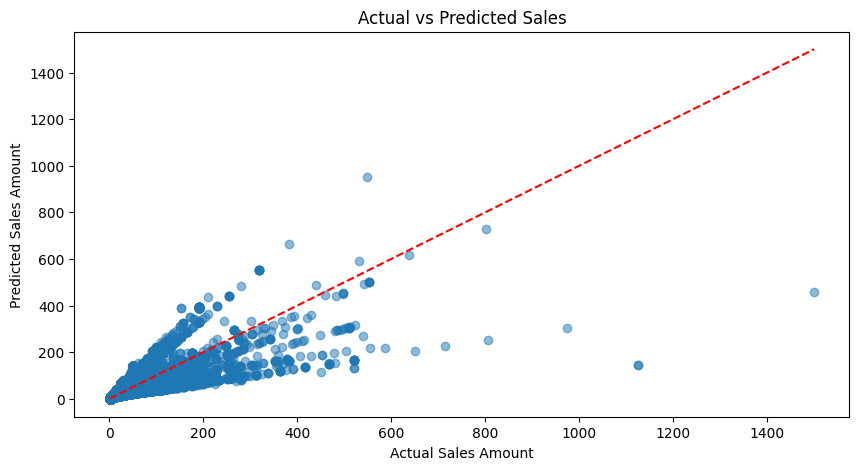

In [7]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')
plt.xlabel("Actual Sales Amount")
plt.ylabel("Predicted Sales Amount")
plt.title("Actual vs Predicted Sales")
plt.show()


LINEAR REGRESSION WITH HYPERPARAMETER TUNING AND REGULARIZATION

In [ ]:
from sklearn.model_selection import GridSearchCV

model = LinearRegression()
params = {'fit_intercept': [True, False],
          'positive': [True, False]
}

grid = GridSearchCV(
    estimator=model,
    param_grid=params,
    cv=5,           # 5-fold cross-validation
    scoring='r2',   # Optimize for R²
    n_jobs=-1       # Use all CPU cores for GridSearchCV
)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
print(grid.best_params_)  # See what worked best

y_pred = best_model.predict(X_test)

{'fit_intercept': False, 'positive': False}


In [21]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 3.89
Mean Squared Error (MSE): 92.53
Root Mean Squared Error (RMSE): 9.62
R² Score: 0.66


LASSO

In [15]:
from sklearn.linear_model import Lasso
params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
grid = GridSearchCV(Lasso(), params, cv=5, scoring='r2')
grid.fit(X_train, y_train)
best_lasso = grid.best_estimator_
print(best_lasso)

Lasso(alpha=0.01)


In [16]:
lasso = Lasso(alpha=0.01)  # alpha controls penalty strength
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

RIDGE REGRESSION

In [19]:
from sklearn.linear_model import Ridge
params = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
grid = GridSearchCV(Ridge(), params, cv=5, scoring='r2')
grid.fit(X_train, y_train)
best_ridge = grid.best_estimator_
print(best_ridge)

Ridge(alpha=100.0)


In [ ]:
ridge = Ridge(alpha=100.0)  # alpha controls penalty strength
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

ALL GIVES SAME RESULT